In [175]:
#@title The MIT License (MIT)
#
# Copyright (c) 2024 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.


# Modelo de Previsão de Dígitos Manuscritos (MNIST)

In [176]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds

## Dataset MNIST

In [177]:
# Carrega o dataset
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Pré-processamento de dados

In [178]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Adicionar uma dimensão extra para o canal
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## Arquitetura do módelo

In [179]:
model = models.Sequential([

  # Camada de entrada
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  # Camada densa
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),

  # Camada de saída
  layers.Dense(10)
])

### Compilação do modelo

In [180]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Treinamento do modelo

In [181]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8227 - loss: 0.8546 - val_accuracy: 0.9688 - val_loss: 0.1183
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9683 - loss: 0.1168 - val_accuracy: 0.9780 - val_loss: 0.0780
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9741 - loss: 0.0923 - val_accuracy: 0.9815 - val_loss: 0.0654
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9792 - loss: 0.0699 - val_accuracy: 0.9766 - val_loss: 0.0776
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9826 - loss: 0.0587 - val_accuracy: 0.9806 - val_loss: 0.0770
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9853 - loss: 0.0534 - val_accuracy: 0.9806 - val_loss: 0.0699
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9855 - loss: 0.0494 - val_accuracy: 0.9826 - val_loss: 0.0785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9880 -

### Avalição do modelo

In [182]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {100*test_acc:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9824 - loss: 0.0858
Acurácia no conjunto de teste: 98.52%


### Previsões

In [183]:
import numpy as np

# Faz previsões com o modelo
predictions = model.predict(x_test)

# Exibir a previsão para a primeira imagem
print(f'Predição para a primeira imagem: {np.argmax(predictions[0])}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predição para a primeira imagem: 7


### Demais caracteres

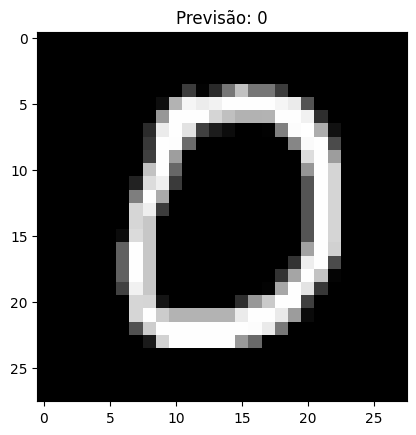

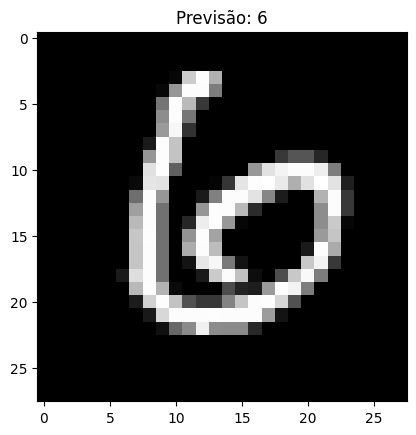

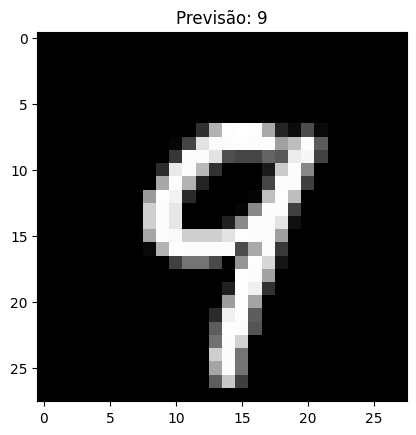

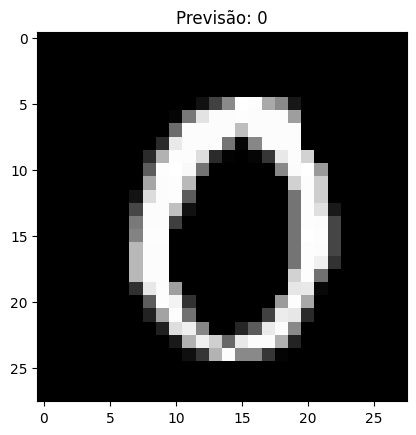

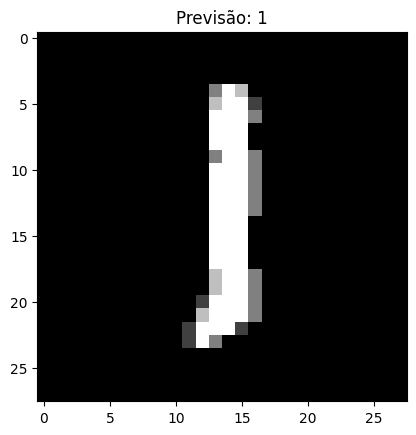

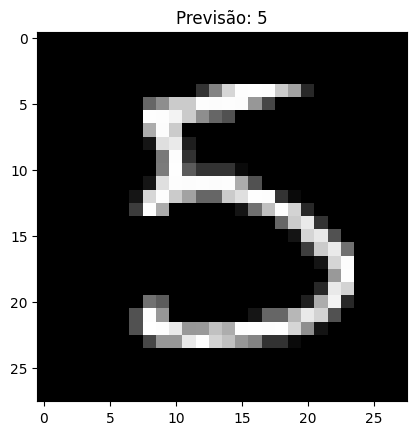

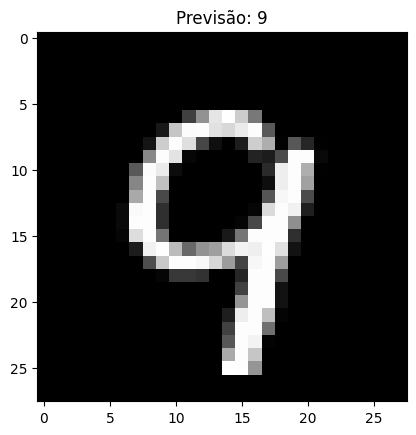

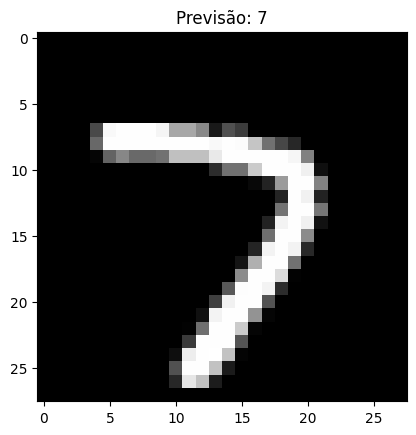

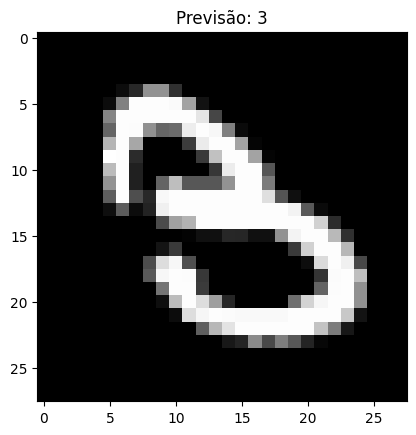

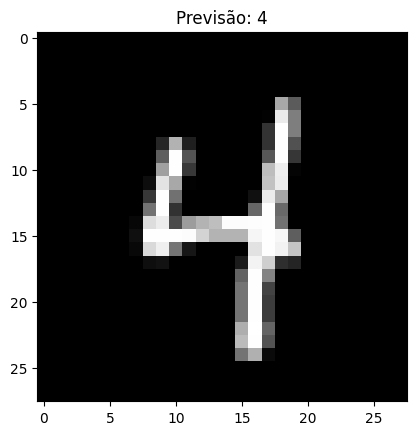

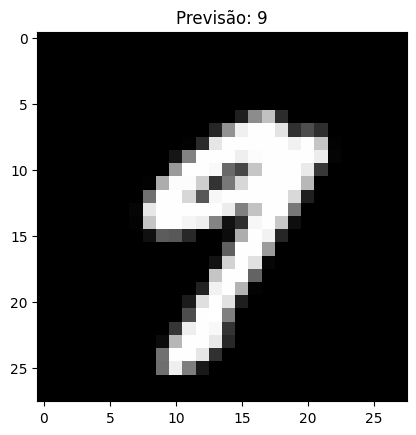

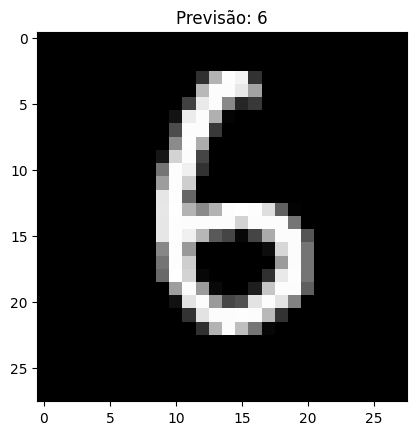

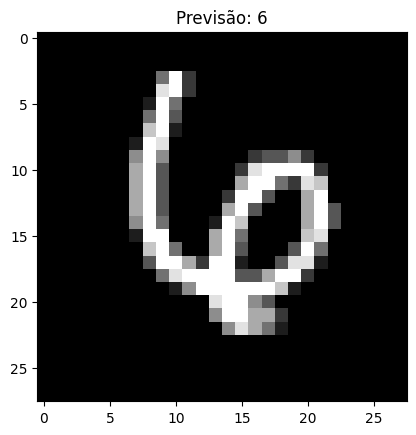

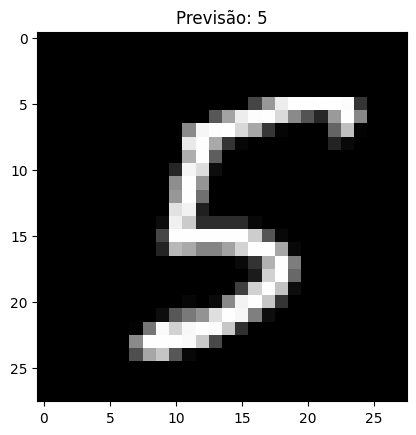

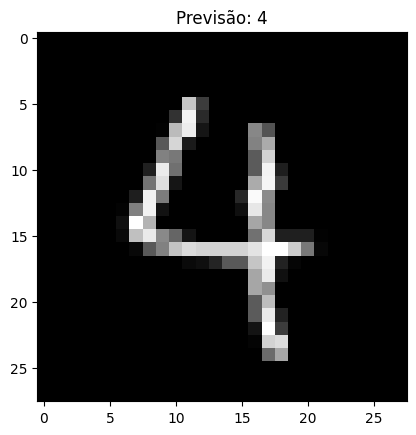

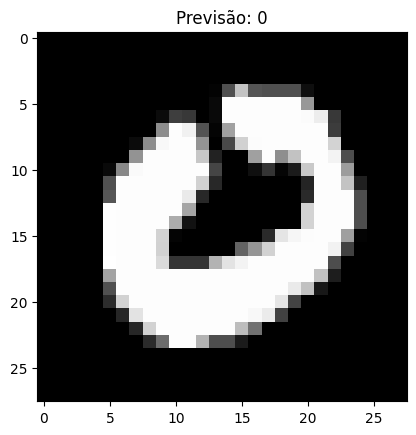

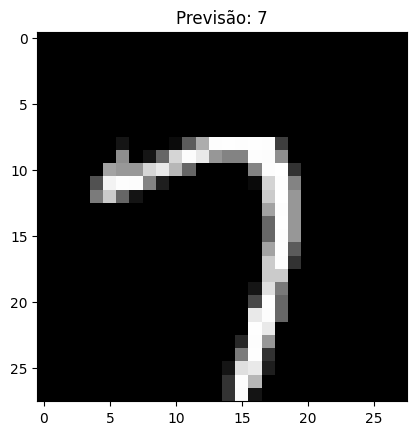

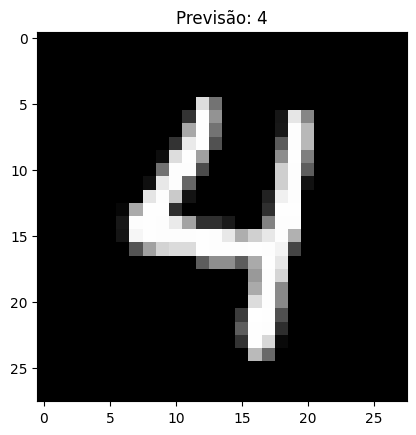

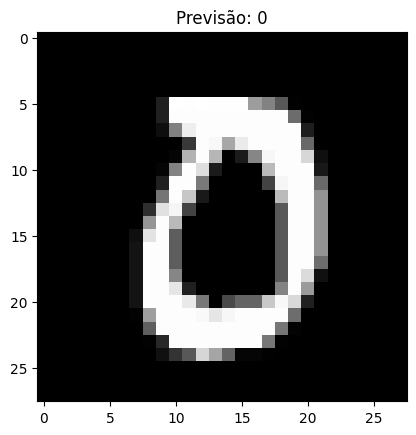

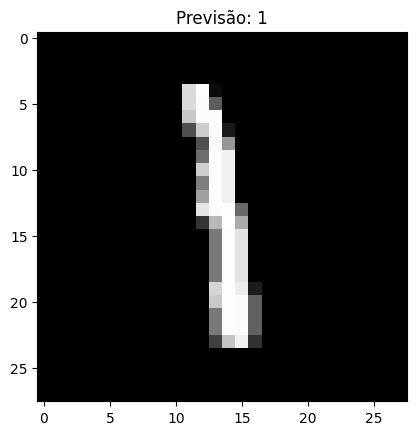

In [184]:
import matplotlib.pyplot as plt

# Visualizar algumas imagens e suas previsões
for i in range(10, 30):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Previsão: {np.argmax(predictions[i])}')
    plt.show()

## Salva o modelo

In [185]:
model.save('mnist_predict_model.keras')